## 1.安裝環境

In [ ]:
!pip install finlab > log.txt

In [ ]:
import pandas as pd
import numpy as np
from finlab import data

## 2.創造資料物件

In [ ]:
# dataframe:資料格式範例
df=data.get('price:收盤價')
df=df[df.index<='2020-07-01']

# series:資料格式範例
series=df['0050']
df

## 3.資料檢索

In [ ]:
df=data.get('price:收盤價')

# head(n):取前n列，預設為5
demo_head=df.head(3)

# tail(n):取後n列，預設為5
demo_tail=df.tail(3)

# index:取索引
demo_index=df.index

# columns:取欄位
demo_columns=df.columns

# values:取值
demo_values=df.values

# boolean indexing:索引布林邏輯篩選，ex:取得索引大於2020年份的資料
demo_boolean_indexing=df[df.index>'2020']

# loc:使用標籤篩選欄列
## ex:選擇2020-01-03~2020-01-08中所有標地的股價
demo_loc1=df.loc['2020-01-03':'2020-01-08']

## ex:選擇0050&1101&2330的股價，以下兩種方法等價
demo_loc2=df.loc[:,['0050','1101','2330']]
demo_column_select=df[['0050','1101','2330']]

## ex:選擇2020-01-03~2020-01-08中0050&1101&2330的股價
demo_loc3=df.loc['2020-01-03':'2020-01-08',['0050','1101','2330']]

# iloc:使用標籤位置篩選欄列
## ex:選擇第6列到第10列的資料
demo_iloc1=df.iloc[5:10]

## ex:選擇df表中第6檔到第10檔標地資料
demo_iloc2=df.iloc[:,5:10]

## ex:選擇第6列到第10列的資料&選擇df表中第6檔到第10檔標地資料
demo_iloc3=df.iloc[5:10,5:10]

# nlargest:取前n大，ex:取近一日股價前n大的標地
demo_nlargest=df.iloc[-1].nlargest(10)

# nsmallest:取前n大，ex:取近一日股價前n小的標地
demo_nsmallest=df.iloc[-1].nsmallest(10)


## 4.顯示控制

pandas預防資源消耗，預設顯示列數為10，中間資料以‘...’帶過，若想要全展開或調整顯示數量來檢視資料，可作以下控制，要注意的是此影響為全域，接下來的顯示數都會被影響。

In [ ]:
df=data.get('price:收盤價')

# 列數全展開
pd.set_option("display.max_rows", None)

# 欄數全展開
pd.set_option("display.max_columns", None)

# 最多顯示20列
pd.set_option("display.max_rows", 20)

# 最多顯示20欄
pd.set_option("display.max_columns", 20)

# # 還原顯示數預設初始值
pd.reset_option("^display")
df

,0015,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059,0060,0061,006201,006202,006203,006204,006205,006206,006207,006208,00625K,00631L,00632R,00633L,00634R,00635U,00636,00636K,00637L,00638R,00639,00640L,00641R,00642U,00643,00643K,00645,00646,00647L,...,9908,9910,9911,9912,9914,9915,9917,9918,9919,9921,9922,9924,9925,9926,9927,9928,9929,9930,9931,9933,9934,9935,9937,9938,9939,9940,9941,9941A,9942,9943,9944,9945,9946,9949,9950,9951,9955,9958,9960,9962
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2007-04-23,9.54,57.85,32.83,38.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.60,28.00,10.35,14.00,48.55,32.35,56.5,21.40,16.55,52.0,1.87,29.35,31.05,16.60,34.60,18.30,4.80,37.00,15.80,28.55,48.55,9.93,27.55,31.25,30.80,95.00,21.60,NaN,48.70,19.70,31.00,30.35,9.78,73.60,13.25,51.3,72.40,NaN,46.00,49.60
2007-04-24,9.54,58.10,32.99,38.65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.50,27.75,10.35,14.40,48.95,32.60,55.5,21.30,16.40,52.5,1.83,29.30,30.95,16.45,34.80,18.25,4.82,39.55,15.30,28.30,47.80,9.75,27.30,31.40,30.60,94.50,21.50,NaN,48.70,19.65,32.00,30.50,9.91,75.00,13.25,50.5,71.60,NaN,45.90,50.40
2007-04-25,9.52,57.60,32.80,38.59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.10,27.80,10.20,14.00,49.75,32.10,55.5,21.20,17.35,54.1,1.83,29.15,30.70,16.40,34.95,18.15,4.71,42.30,16.20,28.10,46.80,9.68,28.35,31.30,30.00,94.40,21.55,NaN,48.60,19.65,32.30,29.50,10.10,74.60,13.30,49.9,71.60,NaN,49.10,49.10
2007-04-26,9.59,57.70,32.80,38.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.25,27.90,10.05,14.00,49.60,32.50,57.4,21.05,16.95,55.4,1.90,29.20,30.70,16.40,34.35,18.05,4.81,42.30,15.80,28.00,46.80,9.81,28.20,31.45,29.75,94.90,21.65,NaN,47.65,19.50,31.60,29.15,10.80,74.50,13.25,49.5,71.00,NaN,48.90,48.00
2007-04-27,9.55,57.50,32.72,38.40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,18.25,27.75,9.90,14.00,49.00,31.65,56.8,21.00,17.20,55.6,1.77,29.35,30.70,16.60,34.05,18.00,4.85,40.00,15.70,27.80,44.70,10.20,28.20,29.50,29.35,95.00,21.60,NaN,47.80,19.35,31.40,28.50,11.55,75.70,13.15,48.8,69.50,NaN,48.60,46.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-24,NaN,136.70,57.60,124.70,65.75,NaN,21.17,34.66,93.75,NaN,NaN,NaN,23.55,20.76,NaN,65.20,89.95,38.10,38.00,31.06,78.65,NaN,127.75,5.62,67.30,3.86,23.82,27.22,9.71,26.55,7.77,17.05,28.49,10.62,12.50,18.51,NaN,25.48,36.48,63.80,...,33.40,223.00,67.00,8.93,312.00,NaN,93.6,40.20,34.60,319.0,NaN,44.60,38.65,48.10,35.40,5.41,11.40,47.00,39.90,38.75,17.05,21.65,47.75,100.50,76.00,30.60,138.50,51.2,96.20,64.00,22.00,54.20,14.80,10.80,12.35,94.5,18.75,134.5,27.55,11.00
2021-06-25,NaN,136.95,57.85,124.30,66.30,31.84,21.25,34.74,94.05,NaN,NaN,NaN,23.94,20.86,NaN,65.50,90.50,38.65,38.55,31.49,78.90,NaN,128.65,5.61,69.65,3.79,23.82,27.73,9.93,27.54,7.64,17.33,28.91,10.52,12.51,18.77,NaN,25.67,36.54,64.35,...,33.45,241.50,66.00,9.00,320.00,NaN,93.8,39.90,34.60,322.5,NaN,45.15,38.70,48.25,37.50,5.50,11.40,47.00,39.70,38.35,17.15,22.25,48.20,101.00,76.00,30.20,138.00,51.2,95.30,63.80,22.25,54.80,15.00,10.80,12.30,94.1,18.85,131.5,27.55,12.10
2021-06-28,NaN,137.20,57.90,124.20,66.15,31.84,21.29,35.10,94.05,NaN,NaN,NaN,24.00,20.83,NaN,65.45,91.10,38.53,38.40,31.63,79

## 5.資料運算

In [ ]:
df=data.get('price:收盤價')

# 產生股價大於100元的布林dataframe，若大於100則顯示True(計算時視為1)，若不大於100則顯示False(計算時視為0)
price_up_10=df>100

# sum:加總，axis=0為整欄加總，axis=1為整列加總。ex:計算每日股價大於100的標地數量
demo_sum=price_up_10.sum(axis=1)

# mean:平均數，常用於計算均線。
demo_mean=df.mean()

# median:中位數
demo_median=df.median()

# std:標準差，常用於計算乖離率。
demo_std=df.std()

# max:最大值
demo_max=df.max()

# min:最小值
demo_min=df.min()

# cumsum:累加
## ex:累積漲多少元
demo_diff=df.diff()
demo_cumsum=demo_diff.cumsum()

# cumprod:累乘
## ex:計算累積報酬率
demo_pct_change=df.pct_change()+1
demo_cumprod=demo_pct_change.cumprod()

# cummax:累積最大值，常用於計算drawdown
demo_cummax=df.cummax()

# cummin:累積最小值
demo_cummin=df.cummin()

# quantile:第c百分位數數值，常用於取標的數前c%強標地
demo_quantile=df.iloc[-1].quantile(0.9)

# corr:相關性
demo_corr=df.iloc[:,:5].corr()

# describe:取統計資料
demo_describe=df.describe()

## 6.移動窗格作業

In [ ]:
df=data.get('price:收盤價')

# shift:資料移動，常用於前後期數值增減比較、年增率計算
## ex:收盤價向下平移一列
demo_shift1=df.shift()
## ex:收盤價向上平移一列
demo_shift2=df.shift(-1)

# rolling:移動窗格作業，常結合資料運算公式做滾動式計算，ex:計算20日移動平均線(前n筆數資料未滿10日取na，未滿20日以n日計算)
demo_rolling=df.rolling(20,min_periods=10).mean()

# diff:列數相減，ex:取每日漲跌價
demo_diff=df.diff()

# pct_change:列數相除，ex:取每日漲跌幅
demo_pct_change=df.pct_change()

## 7.使用FinlabDataFrame的功能

除了使用熟悉的 Pandas 語法，還可以使用FinlabDataFrame的function!

data.get()的資料繼承FinlabDataFrame的功能，function下列:


1.   average(n):取移動平均，min_periods=int(n/2)。
2.   is_largest(n):取前n大。
3.   is_smallest(n):取前n小。
4.   rise(n=1):取比前第n筆高。
5.   fall(n=1):取比前第n筆低。
6.   sustain(nwindow, nsatisfy=None):取滾動nwindow筆加總大於nsatisfy。
7.   quantile_row(n):返回請求軸上給n定分位數的值。


In [ ]:
df[['0050','1101']].average(10)
df.iloc[-10:].is_largest(5)
df.iloc[-10:].is_smallest(5)
df.iloc[-10:,10:15].rise()
df.iloc[-10:,10:15].fall()
# ex:是否連兩日上漲？
df.iloc[-10:,10:15].rise().sustain(2)
# ex:取近10日股價前90％分位數
df.iloc[-10:].quantile_row(0.9)

## 8.視覺化

### 8-1.乖離率線圖

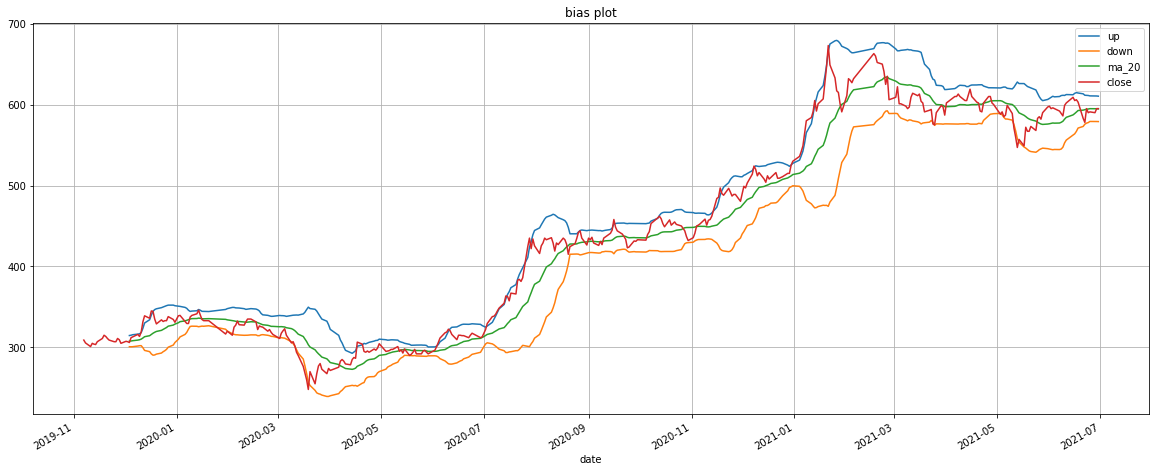

In [ ]:
df=data.get('price:收盤價').iloc[-400:]['2330']
mean_20=df.rolling(20).mean()
std_value=df.rolling(20).std()

up=mean_20+std_value*2
down=mean_20-std_value*2
up.plot(label='up',legend=True)
down.plot(label='down',legend=True)
mean_20.plot(label='ma_20',legend=True)
df.plot(title='bias plot',label='close',legend=True,figsize=(20, 8),grid=True)


### 8-2.相關性熱力圖

In [ ]:
df=data.get('price:收盤價')
check_list=['1101','1102','2330','2454','6263','9939']
demo_corr=df.iloc[-600:][check_list].corr()

demo_corr.style.background_gradient(cmap ='viridis')\
        .set_properties(**{'font-size': '20px'})

,1101,1102,2330,2454,6263,9939
1101,1.000000,0.836385,0.562459,0.636151,0.571586,0.766617
1102,0.836385,1.000000,0.383488,0.445629,0.627689,0.754899
2330,0.562459,0.383488,1.000000,0.976506,0.093435,0.777646
2454,0.636151,0.445629,0.976506,1.000000,0.204041,0.808426
6263,0.571586,0.627689,0.093435,0.204041,1.000000,0.407577
9939,0.766617,0.754899,0.777646,0.808426,0.407577,1.000000


## 9.策略範例

### 9-1.均線多頭

In [ ]:
df=data.get('price:收盤價')
# 限定範圍
df=df[(df.index>'2015')&(df.index<'2019')]

cond1=df>df.rolling(5).mean()
cond2=df>df.rolling(10,min_periods=5).mean()
cond3=df>df.rolling(20,min_periods=10).mean()
cond4=df>df.rolling(60,min_periods=40).mean()

position=(df*(cond1&cond2&cond3&cond4))
position=position[position>0]
position=position.is_largest(10)


,00632R,00635U,00638R,00726B,00732,00741B,00744B,0080,008201,1216,1225,1227,1232,1256,1259,1262,1264,1268,1301,1326,1338,1339,1464,1476,1477,1525,1527,1536,1537,1539,1541,1558,1565,1580,1589,1590,1597,1599,1702,1707,...,8114,8255,8279,8299,8341,8383,8406,8416,8422,8432,8433,8436,8437,8442,8444,8446,8450,8454,8462,8464,8466,8480,8489,8497,8913,8941,8942,9904,9910,9914,9917,9921,9924,9933,9937,9941,9943,9951,9958,9960
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-05,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2015-01-06,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2015-01-07,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2015-01-08,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2015-01-09,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-24,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2018-12-25,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

### 9-2.突破布林通道上緣

In [ ]:
df=data.get('price:收盤價')
mean_20=df.rolling(20).mean()
std_value=df.rolling(20).std()

up=mean_20+std_value*2

# 收盤價剛站上布林通道上緣
cond1=(df>up)&(df.shift()<up)
cond2=(df>5)&(df<200)
position=(cond1&cond2)
position=position[position>0]
position=position.is_smallest(20)
